https://huggingface.co/docs/transformers/main/en/quicktour#pipeline

https://huggingface.co/docs/transformers/main/en/main_classes/pipelines

https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline

In [1]:
from transformers import pipeline
from PIL import Image
import requests

# Support Task

这里不全, https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline 这里更多

| **Task**                     | **Description**                                              | **Modality**    | **Pipeline identifier**                       |
| ---------------------------- | ------------------------------------------------------------ | --------------- | --------------------------------------------- |
| Text classification          | assign a label to a given sequence of text                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question | Multimodal      | pipeline(task=“document-question-answering”)  |
| Image captioning             | generate a caption for a given image                         | Multimodal      | pipeline(task=“image-to-text”)                |



## parameters

"""
Utility factory method to build a [`Pipeline`].

Pipelines are made of:

    - A [tokenizer](tokenizer) in charge of mapping raw textual input to token.
    - A [model](model) to make predictions from the inputs.
    - Some (optional) post processing for enhancing model's output.

Args:
    task (`str`):
        The task defining which pipeline will be returned.
    model (`str` or [`PreTrainedModel`] or [`TFPreTrainedModel`], *optional*):
        The model that will be used by the pipeline to make predictions. This can be a model identifier or an
        actual instance of a pretrained model inheriting from [`PreTrainedModel`] (for PyTorch) or
        [`TFPreTrainedModel`] (for TensorFlow).

        If not provided, the default for the `task` will be loaded.
    config (`str` or [`PretrainedConfig`], *optional*):
        The configuration that will be used by the pipeline to instantiate the model. This can be a model
        identifier or an actual pretrained model configuration inheriting from [`PretrainedConfig`].

        If not provided, the default configuration file for the requested model will be used. That means that if
        `model` is given, its default configuration will be used. However, if `model` is not supplied, this
        `task`'s default model's config is used instead.
    tokenizer (`str` or [`PreTrainedTokenizer`], *optional*):
        The tokenizer that will be used by the pipeline to encode data for the model. This can be a model
        identifier or an actual pretrained tokenizer inheriting from [`PreTrainedTokenizer`].

        If not provided, the default tokenizer for the given `model` will be loaded (if it is a string). If `model`
        is not specified or not a string, then the default tokenizer for `config` is loaded (if it is a string).
        However, if `config` is also not given or not a string, then the default tokenizer for the given `task`
        will be loaded.
    feature_extractor (`str` or [`PreTrainedFeatureExtractor`], *optional*):
        The feature extractor that will be used by the pipeline to encode data for the model. This can be a model
        identifier or an actual pretrained feature extractor inheriting from [`PreTrainedFeatureExtractor`].

        Feature extractors are used for non-NLP models, such as Speech or Vision models as well as multi-modal
        models. Multi-modal models will also require a tokenizer to be passed.

        If not provided, the default feature extractor for the given `model` will be loaded (if it is a string). If
        `model` is not specified or not a string, then the default feature extractor for `config` is loaded (if it
        is a string). However, if `config` is also not given or not a string, then the default feature extractor
        for the given `task` will be loaded.
    framework (`str`, *optional*):
        The framework to use, either `"pt"` for PyTorch or `"tf"` for TensorFlow. The specified framework must be
        installed.

        If no framework is specified, will default to the one currently installed. If no framework is specified and
        both frameworks are installed, will default to the framework of the `model`, or to PyTorch if no model is
        provided.
    revision (`str`, *optional*, defaults to `"main"`):
        When passing a task name or a string model identifier: The specific model version to use. It can be a
        branch name, a tag name, or a commit id, since we use a git-based system for storing models and other
        artifacts on huggingface.co, so `revision` can be any identifier allowed by git.
    use_fast (`bool`, *optional*, defaults to `True`):
        Whether or not to use a Fast tokenizer if possible (a [`PreTrainedTokenizerFast`]).
    use_auth_token (`str` or *bool*, *optional*):
        The token to use as HTTP bearer authorization for remote files. If `True`, will use the token generated
        when running `huggingface-cli login` (stored in `~/.huggingface`).
    device (`int` or `str` or `torch.device`):
        Defines the device (*e.g.*, `"cpu"`, `"cuda:1"`, `"mps"`, or a GPU ordinal rank like `1`) on which this
        pipeline will be allocated.
    device_map (`str` or `Dict[str, Union[int, str, torch.device]`, *optional*):
        Sent directly as `model_kwargs` (just a simpler shortcut). When `accelerate` library is present, set
        `device_map="auto"` to compute the most optimized `device_map` automatically (see
        [here](https://huggingface.co/docs/accelerate/main/en/package_reference/big_modeling#accelerate.cpu_offload)
        for more information).

        <Tip warning={true}>

        Do not use `device_map` AND `device` at the same time as they will conflict

        </Tip>

    torch_dtype (`str` or `torch.dtype`, *optional*):
        Sent directly as `model_kwargs` (just a simpler shortcut) to use the available precision for this model
        (`torch.float16`, `torch.bfloat16`, ... or `"auto"`).
    trust_remote_code (`bool`, *optional*, defaults to `False`):
        Whether or not to allow for custom code defined on the Hub in their own modeling, configuration,
        tokenization or even pipeline files. This option should only be set to `True` for repositories you trust
        and in which you have read the code, as it will execute code present on the Hub on your local machine.
    model_kwargs (`Dict[str, Any]`, *optional*):
        Additional dictionary of keyword arguments passed along to the model's `from_pretrained(...,
        **model_kwargs)` function.
    kwargs (`Dict[str, Any]`, *optional*):
        Additional keyword arguments passed along to the specific pipeline init (see the documentation for the
        corresponding pipeline class for possible values).

Returns:
    [`Pipeline`]: A suitable pipeline for the task.
"""

# Natural Language Processing

## TextClassificationPipeline

In [2]:
classifier = pipeline(
    task="sentiment-analysis",
    # model = version,
    # -1: cpu, 1,2...means gpu id
    device=0,
    # If the model is too large for a single GPU, you can set device_map="auto" to allow
    # Accelerate to automatically determine how to load and store the model weights.
    device_map=None,
    batch_size=1,
)
classifier  # TextClassificationPipeline

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Using C:\Users\Administrator\AppData\Local\torch_extensions\torch_extensions\Cache\py311_cu118 as PyTorch extensions root...
d:\miniconda3\envs\pytorch\Lib\site-packages\torch\utils\cpp_extension.py:359: UserWarning: Error checking compiler version for cl: [WinError 2] 系统找不到指定的文件。
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
Detected CUDA files, patching ldflags
Emitting ninja build file C:\Users\Administrator\AppData\Local\torch_extensions\torch_extensions\Cache\py311_cu118\cuda_kernel\build.ninja...
Failed to load CUDA kernels. Mra requires custom CUDA kernels. Please verify that compatible versions of PyTorch and CUDA Toolkit are installed: Command '['where', 'cl']' returned non-zer

In [3]:
# use the classifier on your target text:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [4]:
# If you have more than one input, pass your inputs as a list to the pipeline() to return a list of dictionaries:
results = classifier(
    [
        "We are very happy to show you the 🤗 Transformers library.",
        "We hope you don't hate it.",
    ]
)
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


## FillMaskPipeline

In [5]:
unmasker = pipeline(
    task="fill-mask",
    model="bert-base-uncased",
    device=0,
)
unmasker  # FillMaskPipeline

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
unmasker("The quick brown fox [MASK] over the lazy dog.")

[{'score': 0.12410002946853638,
  'token': 3427,
  'token_str': 'watched',
  'sequence': 'the quick brown fox watched over the lazy dog.'},
 {'score': 0.08966875821352005,
  'token': 2165,
  'token_str': 'took',
  'sequence': 'the quick brown fox took over the lazy dog.'},
 {'score': 0.04995041713118553,
  'token': 2246,
  'token_str': 'looked',
  'sequence': 'the quick brown fox looked over the lazy dog.'},
 {'score': 0.04328978806734085,
  'token': 2743,
  'token_str': 'ran',
  'sequence': 'the quick brown fox ran over the lazy dog.'},
 {'score': 0.03996002674102783,
  'token': 24358,
  'token_str': 'loomed',
  'sequence': 'the quick brown fox loomed over the lazy dog.'}]

# Audio

## AutomaticSpeechRecognitionPipeline

In [7]:
transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-tiny", device=0
)
transcriber  # AutomaticSpeechRecognitionPipeline

In [8]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac")
# {'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fat and sauce.'}

d:\miniconda3\envs\pytorch\Lib\site-packages\transformers\generation\utils.py:1369: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fat and sauce.'}

# Natural Language Processing

## ZeroShotClassificationPipeline

In [9]:
classifier = pipeline(
    task="zero-shot-image-classification",
    model="openai/clip-vit-base-patch32",
    device=0,
)
classifier  # ZeroShotImageClassificationPipeline

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [10]:
url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

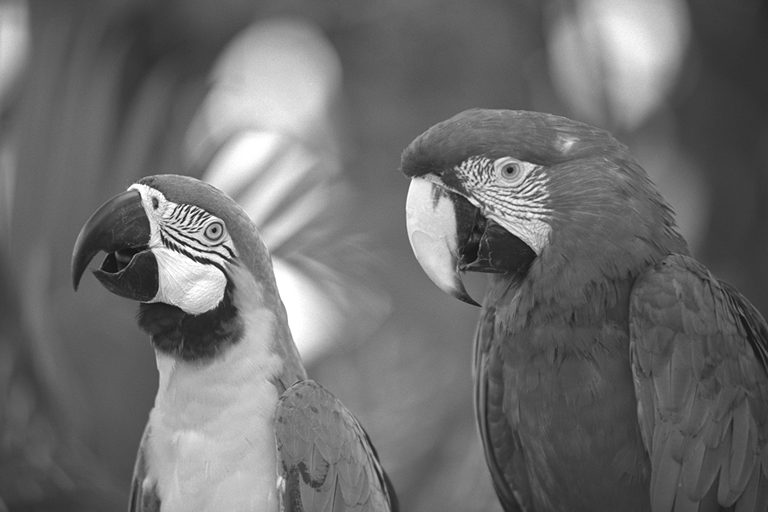

In [11]:
Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [12]:
classifier(
    url,
    candidate_labels=["animals", "humans", "landscape"],
)

[{'score': 0.9007657170295715, 'label': 'animals'},
 {'score': 0.09023214876651764, 'label': 'humans'},
 {'score': 0.009002082981169224, 'label': 'landscape'}]

In [ ]:
classifier(
    url,
    candidate_labels=["black and white", "photorealist", "painting"],
)

# Multimodal

## ImageToTextPipeline

In [13]:
captioner = pipeline(
    task="image-to-text", model="Salesforce/blip-image-captioning-base", device=0
)
captioner  # ImageToTextPipeline

In [14]:
url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

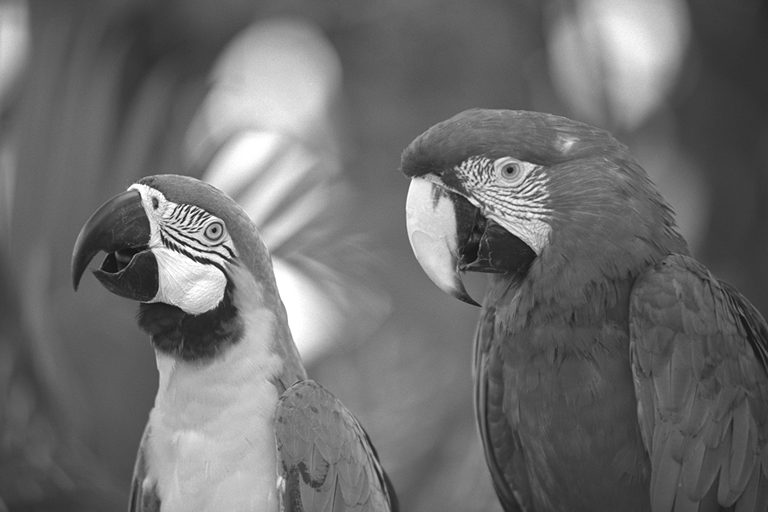

In [15]:
Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [16]:
captioner(url, max_new_tokens=100)
# [{'generated_text': 'two birds are standing next to each other birds'}]

[{'generated_text': 'two birds are standing next to each other birds'}]